# 3.2 Example - QEXAFS Data Processing - Bulk Calibration, Normalization

## This notebook assumes that you have run 
    1. 3.0 Example - Experiment Class - QEXAFS Data Processing - Parameter determination using small data set
    2. 3.1 Example - Experiment Class - QEXAFS Data Processing - Data Import, Cleanup, Process Correlation - large data sets

### Goal of Workflow:

    1. Open existing experiment pickle
    2. Apply Energy Calibration and E0 parameters to data
    3. Apply Normalization parameters to data
    4. Save data for further processing
    
### Steps:
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Define Energy Calibration and E0 paramters
    5. Apply Energy Calibration and E0 paramters to dateset
    6. Normalize Spectra
    7. Save Experiment with 'pickle'

### Things to have ready when attemtping this example:
    1. Directory and filename where the experiment object (pickle) is saved
    2. Parameter valuves from Example 3.0

## Step 1. Import Modules

In [1]:
# DO NOT MODIFY BELOW

# File Handling
import os
import pickle

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp


# Plot Handling
%matplotlib inline

## Step 2. Define Paths

#### Modify:
    1. pickle_dir - directory where to save the experiment
    2. pickpe_name - filename of the saved experiment (must include extension '.pickle')

In [2]:
# Directory Containing Experiment:
pickle_dir = r'D:\UU QEXAFS Workup\Nina - BF31\QEXAFS Python Workup Testing 20220922'

# Name of Experiment (must include extension '.pickle')
pickle_name = 'BF31-Fe-All.pickle'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
# DO NOT MODIFY BELOW

pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Step 4. Define Energy Calibration and E0 parameters
    
    These paramters should be pulled from Example 3.0 where delE was determiend from the reference channel and E0 was determined from the reference and the reduced sample set.
    

In [4]:
# Edge Energies (E0) and Energy Shift
Samp_Edge_params = {'e0': 7125.85,
                    'delE': -1.25
                   }

Ref_Edge_params = {'e0': 7112,
                   'delE': -1.25
                  }

## 5. Apple Energy Calibration and E0 parameters to dataset

In [5]:
# DO NOT MODIFY BELOW

# Sample
my_exp.load_params('mu Sample', Samp_Edge_params)

# Reference
my_exp.load_params('mu Reference', Ref_Edge_params)

## Step 6. Normalize Spectra

### 6a. Define Normalization Paramters

Values obtained from subset analysis in Example 3.0

In [6]:
#Refernece Normalization paramters, referenced to E0
Ref_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

#Sample Normalization paramters, referenced to E0
Samp_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

### 6a. Import Normalization Paramters into each spectrum

In [7]:
# Load normalization parameters into larch groups

# DO NOT MODIFY BELOW

# Sample
my_exp.load_params('mu Sample', Samp_norm_params)

# Reference
my_exp.load_params('mu Reference', Ref_norm_params)

### 6c. Normalize Spectra

In [8]:
# DO NOT MODIFY BELOW

# Reference
my_exp.normalize_spectra('mu Reference')

# Sample
my_exp.normalize_spectra('mu Sample')

### 6d. Remove poorly normalized Spectra

E̲d̲g̲e̲ ̲S̲t̲e̲p̲ ̲C̲h̲a̲r̲a̲c̲t̲e̲r̲i̲s̲t̲i̲c̲s̲:
	Spectra interrogated: 2543
	Largest Edge Step: 1.095
	Smallest Edge Step: 0.212
	Mean Edge Step: 0.225
	Deviation in Edge Step: 0.018


P̲r̲o̲b̲l̲e̲m̲a̲t̲i̲c̲ ̲S̲p̲e̲c̲t̲r̲a̲:
	Number of Spectra: 1
		20211119_ME_BF31_Fe_B_03086
                   1.095384


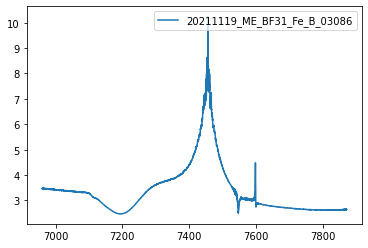

In [9]:
# Look for spectra with edge steps smaller or larger than X standard deviations from the mean

deviations = 3

# DO NOT MODIFY BELOW
bad_spectra = my_exp.edge_step_screen(deviations = deviations, print_summary = True, show_problem_spectra = True)

In [10]:
# Remove the bad spectra from the dataset

# DO NOT MODIFY BELOW

my_exp.remove_bad_spectra(bad_spectra['Filename'])

Removing 20211119_ME_BF31_Fe_B_03086
	Removed from Spectra
	Removed from the summary: "XAS Spectra Files
	Removed from the summary: "XAS Spectra Process Params"
Spectra Removed list has been updated


### 6e. Visualize Normalized Spectra

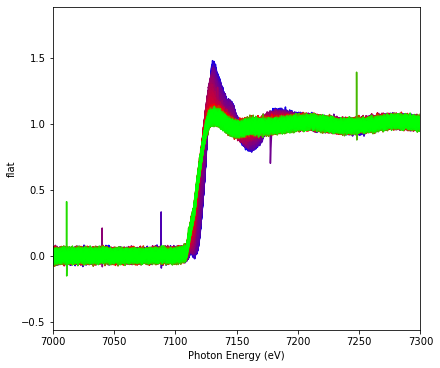

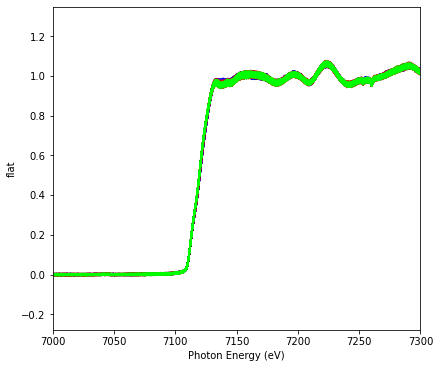

In [11]:
## VERY TIME INTENSIVE ##

# MODIFY: emin, emax 

emin = 7000
emax = 7300 


# DO NOT MODIFY BELOW

# Sample

S_groups = []


for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_XANES(S_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_XANES(R_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

## Step 7. Save Experiment with 'pickle' 
    Pickle - A method to save the experimental class and reopen it elsewhere.

In [12]:
# DO NOT MODIFY BELOW

pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()

# Do not forget to kill this kernal to prevent pileup on the RAM